In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
anime = pd.read_csv("./Data/AnimeList.csv")
anime.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,...,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,...,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."


In [3]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14478 entries, 0 to 14477
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   anime_id        14478 non-null  int64  
 1   title           14478 non-null  object 
 2   title_english   5724 non-null   object 
 3   title_japanese  14443 non-null  object 
 4   title_synonyms  8937 non-null   object 
 5   image_url       14382 non-null  object 
 6   type            14478 non-null  object 
 7   source          14478 non-null  object 
 8   episodes        14478 non-null  int64  
 9   status          14478 non-null  object 
 10  airing          14478 non-null  bool   
 11  aired_string    14478 non-null  object 
 12  aired           14478 non-null  object 
 13  duration        14478 non-null  object 
 14  rating          14478 non-null  object 
 15  score           14478 non-null  float64
 16  scored_by       14478 non-null  int64  
 17  rank            12904 non-null 

In [4]:
anime.columns

Index(['anime_id', 'title', 'title_english', 'title_japanese',
       'title_synonyms', 'image_url', 'type', 'source', 'episodes', 'status',
       'airing', 'aired_string', 'aired', 'duration', 'rating', 'score',
       'scored_by', 'rank', 'popularity', 'members', 'favorites', 'background',
       'premiered', 'broadcast', 'related', 'producer', 'licensor', 'studio',
       'genre', 'opening_theme', 'ending_theme'],
      dtype='object')

Well, that's a lot! We should drop some columns

I have already think of dropping the titles, image's URL, Opening and Ending theme since they are redundant and do not provide anything new about the animes. But what are the scored_by, popularity,etc?
Let's learn about those columns directly from MyAnimeList and the data itself. 

Well, let's try to explain each column, one by one.

First of all, the `anime_id` column is the unique ID for every anime on the list. It is a primary key to distinguish every anime to each other.

The `title` column is the anime's names. Similarly, the `title_english`, `title_japanese`, `title_synonyms` are literaly the same to `title`, but they are in different languages and their synonyms, which implies they are redundant and we can safely drop them.

The `image_url` points to the poster image of the anime. We can drop them since it is a link and it won't add any new information to the anime.

There is the easy part, now we must browse our data for more information. 
 

In [5]:
anime = anime.drop(columns=['title_english', 'title_japanese','title_synonyms','image_url'])
anime.columns

Index(['anime_id', 'title', 'type', 'source', 'episodes', 'status', 'airing',
       'aired_string', 'aired', 'duration', 'rating', 'score', 'scored_by',
       'rank', 'popularity', 'members', 'favorites', 'background', 'premiered',
       'broadcast', 'related', 'producer', 'licensor', 'studio', 'genre',
       'opening_theme', 'ending_theme'],
      dtype='object')

I guess the `type` column show what type that anime is. Is it TV or Movie or something else? Let's look at the database for more information.

In [6]:
anime.type.unique()

array(['TV', 'Movie', 'Music', 'OVA', 'ONA', 'Special', 'Unknown'],
      dtype=object)

Exactly! We can spot that there are 7 types of animes. But there is a "weird" type: `Unknown`. Is this a specific type or is this an abbreviate for the `NaN` value?

According to MyAnimeList Search,

![MAL Search](./Images/Anime_Types.png)

there are only 5 types: `TV`, `Movie`, `OVA`, `ONA`, `Special`. So, what do `Music` and `Unknown` mean?

Let take a look at `Unknown` first, since it is the most "weird" type.

In [7]:
print(anime.type.isnull().any())
print(anime.type.isna().any())
anime[anime['type'] == 'Unknown'].head()

False
False


,anime_id,title,type,source,episodes,status,airing,aired_string,aired,duration,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
187,35759,Sidonia no Kishi 3,Unknown,Manga,0,Not yet aired,False,Not available,"{'from': None, 'to': None}",24 min.,...,NaN,NaN,NaN,"{'Adaptation': [{'mal_id': 13723, 'type': 'man...",NaN,NaN,NaN,"Action, Sci-Fi, Space, Mecha, Seinen",[],[]
511,37651,Fate/Extra: Last Encore - Irusterias Tendouron,Unknown,Game,0,Not yet aired,False,"Jul, 2018 to ?","{'from': '2018-07-12', 'to': None}",Unknown,...,NaN,NaN,NaN,"{'Adaptation': [{'mal_id': 32425, 'type': 'man...",NaN,NaN,NaN,"Action, Magic, Fantasy",[],[]
1396,35252,Hatena☆Illusion,Unknown,Light novel,0,Not yet aired,False,Not available,"{'from': None, 'to': None}",Unknown,...,NaN,NaN,NaN,"{'Adaptation': [{'mal_id': 80851, 'type': 'man...",NaN,NaN,NaN,"Comedy, Supernatural, Romance, Ecchi",[],[]
1989,36407,Kenja no Mago,Unknown,Light novel,0,Not yet aired,False,Not available,"{'from': None, 'to': None}",Unknown,...,NaN,NaN,NaN,"{'Adaptation': [{'mal_id': 90561, 'type': 'man...",NaN,NaN,NaN,"Action, Comedy, Magic, Fantasy",[],[]
2326,34649,Soukyuu no Fafner: Dead Aggressor - The Beyond,Unknown,Original,0,Not yet aired,False,Not available,"{'from': None, 'to': None}",Unknown,...,NaN,NaN,NaN,"{'Other': [{'mal_id': 75, 'type': 'anime', 'ur...",NaN,NaN,Xebec Zwei,"Action, Military, Sci-Fi, Drama, Mecha",[],[]


We can see that all the `Unknown` type animes are not aired yet. Thus, we do not have any information about these animes yet, except their name, their related anime/manga, their sources and their genres. We can consider to keep them, since they will show us the trend of future airing animes.

Now, let take a look at `Music` type animes. 

In [8]:
anime[anime['type'] == 'Music'].shape

(849, 27)

A few Google search show that all the `Music` type "Anime" are all music videos. It means that they are not related to our interest. We can drop all the `Music` type entries.

In [9]:
anime = anime[anime['type'] != 'Music']
anime.shape

(13629, 27)

In [10]:
print("We check the columns of the dataset:")
anime.columns

We check the columns of the dataset:


Index(['anime_id', 'title', 'type', 'source', 'episodes', 'status', 'airing',
       'aired_string', 'aired', 'duration', 'rating', 'score', 'scored_by',
       'rank', 'popularity', 'members', 'favorites', 'background', 'premiered',
       'broadcast', 'related', 'producer', 'licensor', 'studio', 'genre',
       'opening_theme', 'ending_theme'],
      dtype='object')

We can easily know that the `source` of the animes are Game, Manga or something similar to that. Let's check all the available source of the animes:

In [11]:
anime['source'].unique()

array(['Manga', 'Original', 'Light novel', '4-koma manga', 'Novel',
       'Visual novel', 'Unknown', 'Other', 'Game', 'Picture book',
       'Card game', 'Web manga', 'Book', 'Music', 'Radio',
       'Digital manga'], dtype=object)

Easily, we can spot the `Unknown` source and may think that it is associated with the `Unknown` type of animes above. Let check that.

In [12]:
anime[anime['type'] == 'Unknown']['source'].value_counts()

Original        10
Manga            7
Light novel      4
Unknown          3
Game             2
4-koma manga     2
Novel            1
Other            1
Name: source, dtype: int64

It seems that almost all `Unknown` type animes have their own source different than `Unknown`. Therefore, `Unknown` source and `Unknown` type is irrelevant to each other. That raise a question, what does `Unknown` source mean?

First of all, let take a look at some `Unknown` source animes.

In [13]:
anime[anime['source'] == 'Unknown'].shape

(4006, 27)

Wow, there are 4006 `Unknown` source animes! Let look at some of them:

In [14]:
anime[anime['source'] == 'Unknown'].head()

,anime_id,title,type,source,episodes,status,airing,aired_string,aired,duration,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
54,11547,Sengoku☆Paradise Kiwami,TV,Unknown,26,Finished Airing,False,"Oct 4, 2011 to Mar 27, 2012","{'from': '2011-10-04', 'to': '2012-03-27'}",3 min. per ep.,...,NaN,Fall 2011,Unknown,[],"TV Tokyo, G-mode",NaN,"Milky Cartoon, LMD","Action, Comedy, Drama, Historical, Romance, Sa...","['#01: ""Return Ranse Dokugan Ryuu (リターン乱世独眼竜)""...","['""Return Ranse Dokugan Ryuu (リターン乱世独眼竜)"" by T..."
58,7605,Parasol Henbei,TV,Unknown,200,Finished Airing,False,"Oct 2, 1989 to Jan 28, 1991","{'from': '1989-10-02', 'to': '1991-01-28'}",10 min. per ep.,...,NaN,Fall 1989,Unknown,[],NaN,NaN,NaN,"Adventure, Comedy, Fantasy, Kids, Magic",[],[]
59,9389,Ginga Hyouryuu Vifam: Kieta 12-nin,OVA,Unknown,1,Finished Airing,False,"Feb 25, 1985","{'from': '1985-02-25', 'to': '1985-02-25'}",57 min.,...,NaN,NaN,NaN,"{'Parent story': [{'mal_id': 2987, 'type': 'an...",NaN,NaN,Sunrise,"Sci-Fi, Adventure, Space, Mecha",[],[]
61,9998,Chuuhai Lemon: Love 30s - Ame ni Nurete mo,OVA,Unknown,1,Finished Airing,False,"Oct 21, 1985","{'from': '1985-10-21', 'to': '1985-10-21'}",44 min.,...,NaN,NaN,NaN,[],"Tsuchida Productions, Wonder Kids",NaN,NaN,"Police, Comedy, Romance, Drama",[],[]
64,5588,Ko Ko Ro,OVA,Unknown,2,Finished Airing,False,"Dec 21, 2001 to Jun 21, 2002","{'from': '2001-12-21', 'to': '2002-06-21'}",30 min. per ep.,...,NaN,NaN,NaN,[],NaN,NaN,NaN,Hentai,[],[]


It seems that the `Unknown` source animes have a lot of `NaN` value in their attributes. But notice that all five animes above finished airing. Maybe most of `Unknown` source animes are finished?

In [15]:
anime[anime['source'] == 'Unknown']['airing'].value_counts()

False    3988
True       18
Name: airing, dtype: int64

Yeah, that is right. We also notice that, the aired date of these animes are quite old. Maybe they are outdated animes and only a few audiences watch them?

Well, let's extract the airing time and see if there is any pattern for the `Unknown` source animes. First of all, we know that ther are at least 18 animes are airing, so there must be some `NaN` or `None` timestamp. Let check the type of the elements:
    

In [16]:
print(anime['aired'].iloc[0])
type(anime['aired'].iloc[0])

{'from': '2012-01-13', 'to': '2012-03-30'}


str

Indeed every entry of this column is a `str` type. But we can change this into a `dict` type, where the key `from` indicate the started airing time and `to` show the finishing time.

We would try to check if there is any `NaN` value in the `aired` column

In [17]:
anime['aired'].isna().any()

False

Wow, there is no `NaN` value. That means all the entries are filler, but they can be a `None` timestamp.

That's great! Now we can change all the `str` to `dict` using a built-in function: `ast.literal_eval`

In [18]:
#Using built-in function ast.literal_eval to convert a string dict to a dict
import ast
anime['aired'] = anime['aired'].apply(ast.literal_eval)
#Check the type
type(anime['aired'].iloc[0])

dict

Now we will try to extract the beginning and the ending time of all the animes, so that we can ivestigate them later.

In [19]:
# def extract_start(anime):
#     return anime['from']

# def extract_end(anime):
#     return anime['to']

# start = pd.Series(np.vectorize(extract_start)(anime['aired']))
# end = pd.Series(np.vectorize(extract_end)(anime['aired']))


start = anime['aired'].apply(lambda anime: anime['from'])
end = anime['aired'].apply(lambda anime: anime['to'])

start.name = 'start'
end.name = 'end'
anime = pd.concat([anime, start, end], axis = 1)
start

0        2012-01-13
1        2007-04-02
2        2008-10-04
3        2002-08-16
4        2012-10-06
            ...    
14473    1987-11-05
14474    1986-03-21
14475          None
14476          None
14477    2010-04-07
Name: start, Length: 13629, dtype: object

In [20]:
anime = anime.rename(columns={0: 'start', 1: 'end'})
anime.columns

Index(['anime_id', 'title', 'type', 'source', 'episodes', 'status', 'airing',
       'aired_string', 'aired', 'duration', 'rating', 'score', 'scored_by',
       'rank', 'popularity', 'members', 'favorites', 'background', 'premiered',
       'broadcast', 'related', 'producer', 'licensor', 'studio', 'genre',
       'opening_theme', 'ending_theme', 'start', 'end'],
      dtype='object')

Let's convert all the values of the 2 newly created columns to `timedate` type.

In [21]:
anime['start'] = pd.to_datetime(anime[anime['start'] != 'None']['start'])
anime['end'] = pd.to_datetime(anime[anime['end'] != 'None']['end'])

Now, we can drop the `aired` column and start to investigate the `Unknown` source animes.

In [22]:
anime = anime.drop(columns='aired')


In [23]:
print(anime[anime['source'] == 'Unknown']['start'].dt.year.mean())
print(anime[anime['source'] == 'Unknown']['start'].dt.year.std())

1998.3289669544508
12.486102954042744


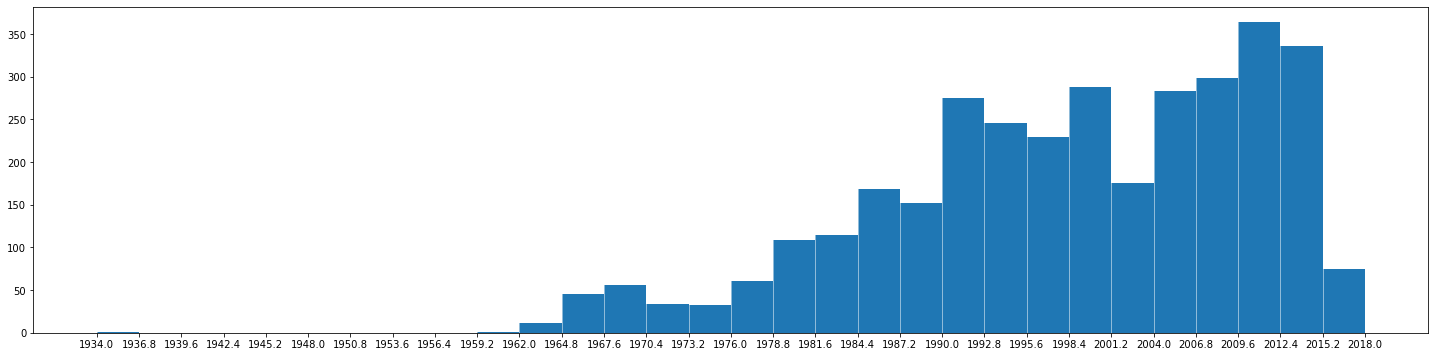

In [25]:
plt.figure(figsize=(25,6))
n, bins, patches= plt.hist(anime[anime['source'] == 'Unknown']['start'].dt.year,bins='rice')
plt.grid(color='white', lw = 0.5, axis = 'x')
plt.xticks(bins)
plt.show()
